In [1]:
!pip install bs4
!pip install requests

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
page=requests.get('https://homefinder.com/homes-for-sale/CA/county/Los-Angeles?beds=3&baths=2&propertyTypes=DUPLEX')

In [4]:
page

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Los Angeles County, CA Homes For Sale &amp; Real Estate | MLS Listings in Los Angeles County, CA</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:sit
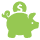

In [5]:
soup=BeautifulSoup(page.content)
soup

In [6]:
price= soup.find('div', class_="h4 text-primary mb-0")
price

<div class="h4 text-primary mb-0">
        $690,000
        <!-- --> <span class="scope-label text-homes-for-sale small">Duplex For Sale</span></div>

In [7]:
price.text.replace('\n',' ')

'         $690,000          Duplex For Sale'

In [8]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $690,000          Duplex For Sale',
 '         $825,000          Duplex For Sale',
 '         $1,495,000          Duplex For Sale',
 '         $750,000          Duplex For Sale',
 '         $769,000          Duplex For Sale',
 '         $839,900          Duplex For Sale',
 '         $899,999          Duplex For Sale',
 '         $959,000          Duplex For Sale',
 '         $1,199,999          Duplex For Sale',
 '         $525,000          Duplex For Sale',
 '         $549,990          Duplex For Sale',
 '         $729,900          Duplex For Sale',
 '         $839,888          Duplex For Sale',
 '         $875,000          Duplex For Sale',
 '         $988,000          Duplex For Sale',
 '         $2,295,000          Duplex For Sale',
 '         $719,900          Duplex For Sale',
 '         $825,000          Duplex For Sale',
 '         $885,000          Duplex For Sale',
 '         $998,999          Duplex For Sale',
 '         $999,800          Duplex For Sale',
 '     

In [9]:
address= soup.find('span', class_="cobrand-attribution-line1 mt-1")
address

<span class="cobrand-attribution-line1 mt-1">
            CHRISTOPHER CABALLERO - CENTURY 21 PRIMETIME REALTORS - CV24103012
          </span>

In [10]:
address.text.replace('\n',' ')

'             CHRISTOPHER CABALLERO - CENTURY 21 PRIMETIME REALTORS - CV24103012           '

In [11]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             CHRISTOPHER CABALLERO - CENTURY 21 PRIMETIME REALTORS - CV24103012           ',
 '             Monica Corral - Century 21 A Better Service - DW24072388           ',
 '             Stephanie Vitacco - Equity Union - SR24092830           ',
 '             Alvaro "Al" Santillan - Century 21 Allstars - DW24089935           ',
 '             Omar Brady - Real Broker - PW23204019           ',
 '             Francisco Amezcua - Realty One Group United - DW24066292           ',
 '             Werner Rosales - Berkshire Hathaway Home Srvs - DW24115493           ',
 '             Maria Olmos - Y Realty - PW24097702           ',
 '             Georgette Solano - Century 21 Allstars - DW24116071           ',
 '             Paul Samuels - eXp Realty - RS23191263           ',
 '             Marcia Goodman - UNITED REALTY GROUP - CV24088046           ',
 '             Drew Baker - Remco - A. R. E. & Mgmt. Co. - PW23197703           ',
 '             Chris Orellana - Lifetime Realty Inc

In [12]:
all= soup.find('div', class_="text-muted")
all

<div class="text-muted">
        6 Bd | 4 Bath | 2,280 Sqft
      </div>

In [13]:
all.text.replace('\n',' ')

'         6 Bd | 4 Bath | 2,280 Sqft       '

In [14]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         6 Bd | 4 Bath | 2,280 Sqft       ',
 '                  Listing Courtesy of:                             CHRISTOPHER CABALLERO - CENTURY 21 PRIMETIME REALTORS - CV24103012           ',
 '         5 Bd | 2 Bath | 1,830 Sqft       ',
 '                  Listing Courtesy of:                             Monica Corral - Century 21 A Better Service - DW24072388           ',
 '         6 Bd | 5 Bath | 3,578 Sqft       ',
 '                  Listing Courtesy of:                             Stephanie Vitacco - Equity Union - SR24092830           ',
 '         5 Bd | 2 Bath | 1,827 Sqft       ',
 '                  Listing Courtesy of:                             Alvaro "Al" Santillan - Century 21 Allstars - DW24089935           ',
 '         7 Bd | 4 Bath | 2,330 Sqft       ',
 '                  Listing Courtesy of:                             Omar Brady - Real Broker - PW23204019           ',
 ' Get Connected Today! ',
 '         4 Bd | 3 Bath | 1,528 Sqft       ',
 '              

In [15]:
import re
property_info =['         6 Bd | 4 Bath | 2,280 Sqft       ',
 '                  Listing Courtesy of:                             CHRISTOPHER CABALLERO - CENTURY 21 PRIMETIME REALTORS - CV24103012           ',
 '         5 Bd | 2 Bath | 1,830 Sqft       ',
 '                  Listing Courtesy of:                             Monica Corral - Century 21 A Better Service - DW24072388           ',
 '         6 Bd | 5 Bath | 3,578 Sqft       ',
 '                  Listing Courtesy of:                             Stephanie Vitacco - Equity Union - SR24092830           ',
 '         5 Bd | 2 Bath | 1,827 Sqft       ',
 '                  Listing Courtesy of:                             Alvaro "Al" Santillan - Century 21 Allstars - DW24089935           ',
 '         7 Bd | 4 Bath | 2,330 Sqft       ',
 '                  Listing Courtesy of:                             Omar Brady - Real Broker - PW23204019           ',
 ' Get Connected Today! ',
 '         4 Bd | 3 Bath | 1,528 Sqft       ',
 '                  Listing Courtesy of:                             Francisco Amezcua - Realty One Group United - DW24066292           ',
 '         6 Bd | 3 Bath | 2,200 Sqft       ',
 '                  Listing Courtesy of:                             Werner Rosales - Berkshire Hathaway Home Srvs - DW24115493           ',
 '         4 Bd | 2 Bath | 1,628 Sqft       ',
 '                  Listing Courtesy of:                             Maria Olmos - Y Realty - PW24097702           ',
 '         5 Bd | 4 Bath | 3,160 Sqft       ',
 '                  Listing Courtesy of:                             Georgette Solano - Century 21 Allstars - DW24116071           ',
 '         6 Bd | 3 Bath | 2,750 Sqft       ',
 '                  Listing Courtesy of:                             Paul Samuels - eXp Realty - RS23191263           ',
 '         4 Bd | 2 Bath | 1,536 Sqft       ',
 '                  Listing Courtesy of:                             Marcia Goodman - UNITED REALTY GROUP - CV24088046           ',
 '         4 Bd | 3 Bath | 1,704 Sqft       ',
 '                  Listing Courtesy of:                             Drew Baker - Remco - A. R. E. & Mgmt. Co. - PW23197703           ',
 '         3 Bd | 2 Bath | 1,056 Sqft       ',
 '                  Listing Courtesy of:                             Chris Orellana - Lifetime Realty Inc - PW24113982           ',
 '         4 Bd | 2 Bath | 1,536 Sqft       ',
 '                  Listing Courtesy of:                             Mark Lorico - Circle Real Estate - DW24113390           ',
 '         6 Bd | 3 Bath | 2,472 Sqft       ',
 '                  Listing Courtesy of:                             Chris Orellana - Lifetime Realty Inc - PW24039658           ',
 '         4 Bd | 4 Bath | 2,503 Sqft       ',
 '                  Listing Courtesy of:                             Jean-Paul Issock - ROC - IN24113741           ',
 ' Get Connected Today! ',
 '         4 Bd | 2 Bath | 1 Sqft       ',
 '                  Listing Courtesy of:                             Manuel Diaz - Realty One Group United - DW24111463           ',
 '         6 Bd | 3 Bath | 2,501 Sqft       ',
 '                  Listing Courtesy of:                             Yolanda Thunderwolf - Sync Brokerage, Inc. - SR24112636           ',
 '         4 Bd | 3 Bath | 1,985 Sqft       ',
 '                  Listing Courtesy of:                             Huok Lo - Lifetime Realty Inc - PW24108193           ',
 '         4 Bd | 3 Bath | 2,000 Sqft       ',
 '                  Listing Courtesy of:                             Katherin Carcamo Williams - Berkshire Hathaway HomeServices California Properties - PW24112598           ',
 '         3 Bd | 3 Bath | 1,800 Sqft       ',
 '                  Listing Courtesy of:                             Jennifer Avellan - Keller Williams SELA - DW24107229           ',
 '         4 Bd | 2 Bath | 2,216 Sqft       ',
 '                  Listing Courtesy of:                             Raaj Shankla - Palm Realty Boutique, Inc. - SB24111436           ']

pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})

for item in bed_bath_sqft:
    print(item)

{'Bed': '6', 'Bath': '4', 'Sqft': '2280'}
{'Bed': '5', 'Bath': '2', 'Sqft': '1830'}
{'Bed': '6', 'Bath': '5', 'Sqft': '3578'}
{'Bed': '5', 'Bath': '2', 'Sqft': '1827'}
{'Bed': '7', 'Bath': '4', 'Sqft': '2330'}
{'Bed': '4', 'Bath': '3', 'Sqft': '1528'}
{'Bed': '6', 'Bath': '3', 'Sqft': '2200'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1628'}
{'Bed': '5', 'Bath': '4', 'Sqft': '3160'}
{'Bed': '6', 'Bath': '3', 'Sqft': '2750'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1536'}
{'Bed': '4', 'Bath': '3', 'Sqft': '1704'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1056'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1536'}
{'Bed': '6', 'Bath': '3', 'Sqft': '2472'}
{'Bed': '4', 'Bath': '4', 'Sqft': '2503'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1'}
{'Bed': '6', 'Bath': '3', 'Sqft': '2501'}
{'Bed': '4', 'Bath': '3', 'Sqft': '1985'}
{'Bed': '4', 'Bath': '3', 'Sqft': '2000'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1800'}
{'Bed': '4', 'Bath': '2', 'Sqft': '2216'}


In [16]:
beds = []
baths = []
sqfts = []

for item in bed_bath_sqft:
    beds.append(item['Bed'])
    baths.append(item['Bath'])
    sqfts.append(item['Sqft'])

print("Beds:", beds)
print("Baths:", baths)
print("Sqfts:", sqfts)

Beds: ['6', '5', '6', '5', '7', '4', '6', '4', '5', '6', '4', '4', '3', '4', '6', '4', '4', '6', '4', '4', '3', '4']
Baths: ['4', '2', '5', '2', '4', '3', '3', '2', '4', '3', '2', '3', '2', '2', '3', '4', '2', '3', '3', '3', '3', '2']
Sqfts: ['2280', '1830', '3578', '1827', '2330', '1528', '2200', '1628', '3160', '2750', '1536', '1704', '1056', '1536', '2472', '2503', '1', '2501', '1985', '2000', '1800', '2216']


In [17]:
print(len(price),len(price),len(beds),len(baths),len(sqfts))

22 22 22 22 22


In [18]:
df=pd.DataFrame({'Price':price,'Address':address,'Beds':beds,'Baths':baths,'Sqfts':sqfts})
df

,Price,Address,Beds,Baths,Sqfts
0,"$690,000 Duplex For Sale",CHRISTOPHER CABALLERO - CENTURY 2...,6,4,2280
1,"$825,000 Duplex For Sale",Monica Corral - Century 21 A Bett...,5,2,1830
2,"$1,495,000 Duplex For Sale",Stephanie Vitacco - Equity Union ...,6,5,3578
3,"$750,000 Duplex For Sale","Alvaro ""Al"" Santillan - Century 2...",5,2,1827
4,"$769,000 Duplex For Sale",Omar Brady - Real Broker - PW2320...,7,4,2330
5,"$839,900 Duplex For Sale",Francisco Amezcua - Realty One Gr...,4,3,1528
6,"$899,999 Duplex For Sale",Werner Rosales - Berkshire Hathaw...,6,3,2200
7,"$959,000 Duplex For Sale",Maria Olmos - Y Realty - PW240977...,4,2,1628
8,"$1,199,999 Duplex For Sale",Georgette Solano - Century 21 All...,5,4,3160
9,"$525,000 Duplex For Sale",Paul Samuels - eXp Realty - RS231...,6,3,2750


In [19]:
df.to_csv('property_info1.csv', index=False)

In [20]:
page=requests.get('https://homefinder.com/homes-for-sale/CA/county/Los-Angeles?propertyTypes=SFH')

In [21]:
page

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Los Angeles County, CA Homes For Sale &amp; Real Estate | MLS Listings in Los Angeles County, CA</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:sit
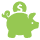

In [22]:
soup=BeautifulSoup(page.content)
soup

In [23]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $799,000          House For Sale',
 '         $859,000          House For Sale',
 '         $1,395,000          House For Sale',
 '         $1,399,999          House For Sale',
 '         $1,400,000          House For Sale',
 '         $1,449,000          House For Sale',
 '         $1,995,000          House For Sale',
 '         $2,695,000          House For Sale',
 '         $3,495,000          House For Sale',
 '         $4,795,000          House For Sale',
 '         $5,000,000          House For Sale',
 '         $12,750,000          House For Sale',
 '         $259,900          House For Sale',
 '         $345,000          House For Sale',
 '         $376,000          House For Sale',
 '         $425,000          House For Sale',
 '         $425,000          House For Sale',
 '         $435,000          House For Sale',
 '         $449,000          House For Sale',
 '         $450,000          House For Sale',
 '         $459,900          House For Sale',
 '         $4

In [24]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         3 Bd | 2 Bath | 1,410 Sqft       ',
 '                  Listing Courtesy of:                             Gevorg Sahakyan - Keller Williams Studio City - 24-385808           ',
 '         4 Bd | 3 Bath | 2,363 Sqft       ',
 '                  Listing Courtesy of:                             Steven Aslanian - RE/MAX ONE - 224002273           ',
 '         3 Bd | 2 Bath | 1,473 Sqft       ',
 '                  Listing Courtesy of:                             Alexandria Jack - Compass - 24-399535           ',
 '         6 Bd | 5 Bath | 3,416 Sqft       ',
 '                  Listing Courtesy of:                             Dimitry Bykov - Equity Union - 24-401895           ',
 '         3 Bd | 2 Bath | 1,824 Sqft       ',
 '                  Listing Courtesy of:                             Kevin Tidwell - Rodeo Realty - 24-395009           ',
 ' Get Connected Today! ',
 '         4 Bd | 6 Bath | 4,800 Sqft       ',
 '                  Listing Courtesy of:                      

In [25]:
import re
property_info =['         2 Bd | 2 Bath | 851 Sqft       ',
 '                  Listing Courtesy of:                             Manuel Ferniza - Keller Williams Realty A.V. - 24004222           ',
 '         3 Bd | 2 Bath | 1,752 Sqft       ',
 '                  Listing Courtesy of:                             Lynn Fitzpatrick - Century 21 Real Estate Alliance - SR24115955           ',
 '         2 Bd | 1 Bath | 720 Sqft       ',
 '                  Listing Courtesy of:                             Cristina Mendoza - Tu Casa Real Estate Inc. - SR24053777           ',
 '         3 Bd | 2 Bath | 1,400 Sqft       ',
 '                  Listing Courtesy of:                             Barbara E Edwards - Redfin Corporation - 24003713           ',
 '         3 Bd | 2 Bath | 1,400 Sqft       ',
 '                  Listing Courtesy of:                             Barbara Edwards - Redfin Corporation - SR24101075           ',
 ' Get Connected Today! ',
 '         3 Bd | 2 Bath | 1,334 Sqft       ',
 '                  Listing Courtesy of:                             Scott Gannon - Gannon Realty Group, Inc. - 24004229           ',
 '         3 Bd | 1 Bath | 1,188 Sqft       ',
 '                  Listing Courtesy of:                             Rhett Richar Winchell - Kennedy Wilson Real Estate Sales & Marke - 24-401085           ',
 '         2 Bd | 1 Bath | 877 Sqft       ',
 '                  Listing Courtesy of:                             Manuel Salazar - Signature Real Estate Group - SW23194644           ',
 '         4 Bd | 2 Bath | 1,707 Sqft       ',
 '                  Listing Courtesy of:                             Lori Fischer - Coldwell Banker-A Hartwig Co. - 24004216           ',
 '         4 Bd | 2 Bath | 1,540 Sqft       ',
 '                  Listing Courtesy of:                             Sorayeh Jamali - Coldwell Banker-A Hartwig Co. - 24004224           ',
 '         1 Bd | 1 Bath | 750 Sqft       ',
 '                  Listing Courtesy of:                             Maria Muriello - Engel & Völkers La Canada - P1-16601           ',
 '         4 Bd | 2 Bath | 1,727 Sqft       ',
 '                  Listing Courtesy of:                             Michelle Ira-Alonso - Re/Max Gateway - 24004217           ',
 '         5 Bd | 3 Bath | 2,849 Sqft       ',
 '                  Listing Courtesy of:                             Brandon King - eXp Realty of California, Inc. - 24004046           ',
 '         4 Bd | 3 Bath | 2,790 Sqft       ',
 '                  Listing Courtesy of:                             Joshua Salazar - San Fernando Realty Mission RE - 24004221           ',
 '         4 Bd | 3 Bath | 2,815 Sqft       ',
 '                  Listing Courtesy of:                             Marco Henriquez - Century 21 Everest - 24004223           ',
 '         2 Bd | 1 Bath | 773 Sqft       ',
 '                  Listing Courtesy of:                             Douglas Carrillo - Century 21 Allstars - DW24115110           ',
 ' Get Connected Today! ',
 '         5 Bd | 3 Bath | 1,356 Sqft       ',
 '                  Listing Courtesy of:                             Saxon Vazquez - EXP REALTY OF CALIFORNIA INC - CV24108935           ',
 '         2 Bd | 3 Bath | 910 Sqft       ',
 '                  Listing Courtesy of:                             Jan Sylvester - Allison James Estates & Homes - SR24116920           ',
 '         3 Bd | 1 Bath | 1,051 Sqft       ',
 '                  Listing Courtesy of:                             MARY REINL - CENTURY 21 CITRUS REALTY INC - CV24106958           ',
 '         4 Bd | 3 Bath | 2,179 Sqft       ',
 '                  Listing Courtesy of:                             Jon P Silva - Keller Williams Realty A.V. - 24004220           ',
 '         3 Bd | 1 Bath | 1,225 Sqft       ',
 '                  Listing Courtesy of:                             Lucy Zion - Century 21 Masters - SW24112991           ',
 '         3 Bd | 2 Bath | 1,338 Sqft       ',
 '                  Listing Courtesy of:                             Steve Gottlieb - Keller Williams South Bay - SB24117037           ']

pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})
for item in bed_bath_sqft:
    print(item)

{'Bed': '2', 'Bath': '2', 'Sqft': '851'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1752'}
{'Bed': '2', 'Bath': '1', 'Sqft': '720'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1400'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1400'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1334'}
{'Bed': '3', 'Bath': '1', 'Sqft': '1188'}
{'Bed': '2', 'Bath': '1', 'Sqft': '877'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1707'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1540'}
{'Bed': '1', 'Bath': '1', 'Sqft': '750'}
{'Bed': '4', 'Bath': '2', 'Sqft': '1727'}
{'Bed': '5', 'Bath': '3', 'Sqft': '2849'}
{'Bed': '4', 'Bath': '3', 'Sqft': '2790'}
{'Bed': '4', 'Bath': '3', 'Sqft': '2815'}
{'Bed': '2', 'Bath': '1', 'Sqft': '773'}
{'Bed': '5', 'Bath': '3', 'Sqft': '1356'}
{'Bed': '2', 'Bath': '3', 'Sqft': '910'}
{'Bed': '3', 'Bath': '1', 'Sqft': '1051'}
{'Bed': '4', 'Bath': '3', 'Sqft': '2179'}
{'Bed': '3', 'Bath': '1', 'Sqft': '1225'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1338'}


In [26]:
beds = []
baths = []
sqfts = []
for item in bed_bath_sqft:
    beds.append(item['Bed'])
    baths.append(item['Bath'])
    sqfts.append(item['Sqft'])
print("Beds:", beds)
print("Baths:", baths)
print("Sqfts:", sqfts)

Beds: ['2', '3', '2', '3', '3', '3', '3', '2', '4', '4', '1', '4', '5', '4', '4', '2', '5', '2', '3', '4', '3', '3']
Baths: ['2', '2', '1', '2', '2', '2', '1', '1', '2', '2', '1', '2', '3', '3', '3', '1', '3', '3', '1', '3', '1', '2']
Sqfts: ['851', '1752', '720', '1400', '1400', '1334', '1188', '877', '1707', '1540', '750', '1727', '2849', '2790', '2815', '773', '1356', '910', '1051', '2179', '1225', '1338']


In [27]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             Gevorg Sahakyan - Keller Williams Studio City - 24-385808           ',
 '             Steven Aslanian - RE/MAX ONE - 224002273           ',
 '             Alexandria Jack - Compass - 24-399535           ',
 '             Dimitry Bykov - Equity Union - 24-401895           ',
 '             Kevin Tidwell - Rodeo Realty - 24-395009           ',
 '             James Chikato - Pinnacle Estate Properties - 24004233           ',
 '             Britney Smits - Pinnacle Estate Properties - 24-401759           ',
 '             Sheri Bienstock - The Bienstock Group - 24-400397           ',
 '             Lynette Bishop - Compass - 24-398243           ',
 '             Craig Knizek - The Agency - 24-401609           ',
 '             Melissa Zee - Keller Williams Beverly Hills - 24-353769           ',
 '             Jill Reeder - Compass - 23-329611           ',
 '             Manuel Ferniza - Keller Williams Realty A.V. - 24004222           ',
 '             Lynn Fitzpatrick - Cen

In [28]:
df=pd.DataFrame({'Price':price,'Address':address,'Beds':beds,'Baths':baths,'Sqfts':sqfts})
df

,Price,Address,Beds,Baths,Sqfts
0,"$799,000 House For Sale",Gevorg Sahakyan - Keller Williams...,2,2,851
1,"$859,000 House For Sale",Steven Aslanian - RE/MAX ONE - 22...,3,2,1752
2,"$1,395,000 House For Sale",Alexandria Jack - Compass - 24-39...,2,1,720
3,"$1,399,999 House For Sale",Dimitry Bykov - Equity Union - 24...,3,2,1400
4,"$1,400,000 House For Sale",Kevin Tidwell - Rodeo Realty - 24...,3,2,1400
5,"$1,449,000 House For Sale",James Chikato - Pinnacle Estate P...,3,2,1334
6,"$1,995,000 House For Sale",Britney Smits - Pinnacle Estate P...,3,1,1188
7,"$2,695,000 House For Sale",Sheri Bienstock - The Bienstock G...,2,1,877
8,"$3,495,000 House For Sale",Lynette Bishop - Compass - 24-398...,4,2,1707
9,"$4,795,000 House For Sale",Craig Knizek - The Agency - 24-40...,4,2,1540


In [29]:
df.to_csv('property_info2.csv', index=False)

In [30]:
page=requests.get('https://homefinder.com/homes-for-sale/CA/county/Los-Angeles?propertyTypes=TOWNHOUSE')

In [31]:
page

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Los Angeles County, CA Homes For Sale &amp; Real Estate | MLS Listings in Los Angeles County, CA</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:sit
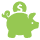

In [32]:
soup=BeautifulSoup(page.content)
soup

In [33]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $460,000          Townhouse For Sale',
 '         $749,000          Townhouse For Sale',
 '         $795,000          Townhouse For Sale',
 '         $895,000          Townhouse For Sale',
 '         $999,000          Townhouse For Sale',
 '         $1,275,000          Townhouse For Sale',
 '         $1,670,000          Townhouse For Sale',
 '         $1,949,000          Townhouse For Sale',
 '         $430,000          Townhouse For Sale',
 '         $459,995          Townhouse For Sale',
 '         $575,000          Townhouse For Sale',
 '         $578,000          Townhouse For Sale',
 '         $585,000          Townhouse For Sale',
 '         $590,000          Townhouse For Sale',
 '         $599,000          Townhouse For Sale',
 '         $602,990          Townhouse For Sale',
 '         $649,800          Townhouse For Sale',
 '         $650,000          Townhouse For Sale',
 '         $659,990          Townhouse For Sale',
 '         $675,000          Townhouse For S

In [34]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         2 Bd | 2 Bath | 813 Sqft       ',
 '                  Listing Courtesy of:                             ANDY NGUYEN - RE/MAX CHAMPIONS - IV24117154           ',
 '         3 Bd | 2 Bath | 1,970 Sqft       ',
 '                  Listing Courtesy of:                             Michael Kim - Realty Pro 100 - OC24104974           ',
 '         3 Bd | 3 Bath | 1,576 Sqft       ',
 '                  Listing Courtesy of:                             Abdulaziz Panamaroff - Compass - 24-400043           ',
 '         2 Bd | 3 Bath | 1,380 Sqft       ',
 '                  Listing Courtesy of:                             Douglas Stockley - eXp Realty of California Inc - 24-400179           ',
 '         3 Bd | 3 Bath | 1,898 Sqft       ',
 '                  Listing Courtesy of:                             Marie Morgenstern - Berkshire Hathaway HomeService - PV24111083           ',
 ' Get Connected Today! ',
 '         3 Bd | 3 Bath | 1,798 Sqft       ',
 '                  Listing Co

In [35]:
import re

property_info = ['         2 Bd | 2 Bath | 813 Sqft       ',
 '                  Listing Courtesy of:                             ANDY NGUYEN - RE/MAX CHAMPIONS - IV24117154           ',
 '         3 Bd | 2 Bath | 1,970 Sqft       ',
 '                  Listing Courtesy of:                             Michael Kim - Realty Pro 100 - OC24104974           ',
 '         3 Bd | 3 Bath | 1,576 Sqft       ',
 '                  Listing Courtesy of:                             Abdulaziz Panamaroff - Compass - 24-400043           ',
 '         2 Bd | 3 Bath | 1,380 Sqft       ',
 '                  Listing Courtesy of:                             Douglas Stockley - eXp Realty of California Inc - 24-400179           ',
 '         3 Bd | 3 Bath | 1,898 Sqft       ',
 '                  Listing Courtesy of:                             Marie Morgenstern - Berkshire Hathaway HomeService - PV24111083           ',
 ' Get Connected Today! ',
 '         3 Bd | 3 Bath | 1,798 Sqft       ',
 '                  Listing Courtesy of:                             Michael Haddad - Compass - 24-401395           ',
 '         2 Bd | 3 Bath | 1,751 Sqft       ',
 '                  Listing Courtesy of:                             Jennifer Portnoy - Compass - 24-400295           ',
 '         3 Bd | 3 Bath | 1,965 Sqft       ',
 '                  Listing Courtesy of:                             Chloe Misisco - Pardee Properties - 24-400301           ',
 '         2 Bd | 1 Bath | 1,108 Sqft       ',
 '                  Listing Courtesy of:                             Diki Stepanian - Engel & Volkers Pasadena - GD24049399           ',
 '         2 Bd | 2 Bath | 998 Sqft       ',
 '                  Listing Courtesy of:                             Ali Dehdashty - Amluck Realty Inc. - SR24114142           ',
 '         2 Bd | 3 Bath | 1,212 Sqft       ',
 '                  Listing Courtesy of:                             Annalee Bauer - eXp Realty of California Inc - SR24114338           ',
 '         2 Bd | 3 Bath | 1,168 Sqft       ',
 '                  Listing Courtesy of:                             RHEA BAI - RE/MAX PREMIER/ARCADIA - WS24111087           ',
 '         2 Bd | 2 Bath | 962 Sqft       ',
 '                  Listing Courtesy of:                             Kym De Lorenzo - NextHome Real Estate Rockstars - SR24115161           ',
 '         3 Bd | 3 Bath | 1,684 Sqft       ',
 '                  Listing Courtesy of:                             Jessie Rodriguez - REAL BROKERAGE TECHNOLOGIES - CV24113358           ',
 '         2 Bd | 2 Bath | 1,250 Sqft       ',
 '                  Listing Courtesy of:                             Anthony N Boulos - Beverly and Company Inc. - 224002226           ',
 '         2 Bd | 3 Bath | 1,692 Sqft       ',
 '                  Listing Courtesy of:                             Cesi Pagano - Keller Williams Realty - OC24115859           ',
 ' Get Connected Today! ',
 '         3 Bd | 3 Bath | 1,497 Sqft       ',
 '                  Listing Courtesy of:                             Jason Lorge - KW THE FOOTHILLS - CV24114977           ',
 '         2 Bd | 3 Bath | 1,396 Sqft       ',
 '                  Listing Courtesy of:                             Anastasia McKinley - RE/MAX One - SR24090521           ',
 '         3 Bd | 4 Bath | 1,956 Sqft       ',
 '                  Listing Courtesy of:                             Cesi Pagano - Keller Williams Realty - OC24115808           ',
 '         3 Bd | 3 Bath | 1,598 Sqft       ',
 '                  Listing Courtesy of:                             Richie Herrera - JohnHart Real Estate - SR24115697           ',
 '         2 Bd | 3 Bath | 1,540 Sqft       ',
 '                  Listing Courtesy of:                             Timothy Ahn - Real Broker - OC24112283           ',
 '         3 Bd | 3 Bath | 1,916 Sqft       ',
 '                  Listing Courtesy of:                             Darren Shack - Pinnacle Estate Properties, Inc. - SR24114762           ']

pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})

for item in bed_bath_sqft:
    print(item)


{'Bed': '2', 'Bath': '2', 'Sqft': '813'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1970'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1576'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1380'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1898'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1798'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1751'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1965'}
{'Bed': '2', 'Bath': '1', 'Sqft': '1108'}
{'Bed': '2', 'Bath': '2', 'Sqft': '998'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1212'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1168'}
{'Bed': '2', 'Bath': '2', 'Sqft': '962'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1684'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1250'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1692'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1497'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1396'}
{'Bed': '3', 'Bath': '4', 'Sqft': '1956'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1598'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1540'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1916'}


In [36]:
beds = []
baths = []
sqfts = []

for item in bed_bath_sqft:
    beds.append(item['Bed'])
    baths.append(item['Bath'])
    sqfts.append(item['Sqft'])
print("Beds:", beds)
print("Baths:", baths)
print("Sqfts:", sqfts)

Beds: ['2', '3', '3', '2', '3', '3', '2', '3', '2', '2', '2', '2', '2', '3', '2', '2', '3', '2', '3', '3', '2', '3']
Baths: ['2', '2', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '3', '2', '3', '3', '3', '4', '3', '3', '3']
Sqfts: ['813', '1970', '1576', '1380', '1898', '1798', '1751', '1965', '1108', '998', '1212', '1168', '962', '1684', '1250', '1692', '1497', '1396', '1956', '1598', '1540', '1916']


In [37]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             ANDY NGUYEN - RE/MAX CHAMPIONS - IV24117154           ',
 '             Michael Kim - Realty Pro 100 - OC24104974           ',
 '             Abdulaziz Panamaroff - Compass - 24-400043           ',
 '             Douglas Stockley - eXp Realty of California Inc - 24-400179           ',
 '             Marie Morgenstern - Berkshire Hathaway HomeService - PV24111083           ',
 '             Michael Haddad - Compass - 24-401395           ',
 '             Jennifer Portnoy - Compass - 24-400295           ',
 '             Chloe Misisco - Pardee Properties - 24-400301           ',
 '             Diki Stepanian - Engel & Volkers Pasadena - GD24049399           ',
 '             Ali Dehdashty - Amluck Realty Inc. - SR24114142           ',
 '             Annalee Bauer - eXp Realty of California Inc - SR24114338           ',
 '             RHEA BAI - RE/MAX PREMIER/ARCADIA - WS24111087           ',
 '             Kym De Lorenzo - NextHome Real Estate Rockstars - SR24115161      

In [38]:
df=pd.DataFrame({'Price':price,'Address':address,'Beds':beds,'Baths':baths,'Sqfts':sqfts})
df

,Price,Address,Beds,Baths,Sqfts
0,"$460,000 Townhouse For Sale",ANDY NGUYEN - RE/MAX CHAMPIONS - ...,2,2,813
1,"$749,000 Townhouse For Sale",Michael Kim - Realty Pro 100 - OC...,3,2,1970
2,"$795,000 Townhouse For Sale",Abdulaziz Panamaroff - Compass - ...,3,3,1576
3,"$895,000 Townhouse For Sale",Douglas Stockley - eXp Realty of ...,2,3,1380
4,"$999,000 Townhouse For Sale",Marie Morgenstern - Berkshire Hat...,3,3,1898
5,"$1,275,000 Townhouse For Sale",Michael Haddad - Compass - 24-401...,3,3,1798
6,"$1,670,000 Townhouse For Sale",Jennifer Portnoy - Compass - 24-4...,2,3,1751
7,"$1,949,000 Townhouse For Sale",Chloe Misisco - Pardee Properties...,3,3,1965
8,"$430,000 Townhouse For Sale",Diki Stepanian - Engel & Volkers ...,2,1,1108
9,"$459,995 Townhouse For Sale",Ali Dehdashty - Amluck Realty Inc...,2,2,998


In [39]:
df.to_csv('property_info3.csv', index=False)

In [40]:
page=requests.get('https://homefinder.com/homes-for-sale/CA/county/Los-Angeles?propertyTypes=MOBILE')

In [41]:
page

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Los Angeles County, CA Homes For Sale &amp; Real Estate | MLS Listings in Los Angeles County, CA</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:sit
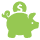

In [42]:
soup=BeautifulSoup(page.content)
soup

In [43]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $119,990          Mobile Home For Sale',
 '         $169,990          Mobile Home For Sale',
 '         $195,000          Mobile Home For Sale',
 '         $229,000          Mobile Home For Sale',
 '         $599,000          Mobile Home For Sale',
 '         $89,900          Mobile Home For Sale',
 '         $164,900          Mobile Home For Sale',
 '         $185,000          Mobile Home For Sale',
 '         $185,000          Mobile Home For Sale',
 '         $189,999          Mobile Home For Sale',
 '         $199,000          Mobile Home For Sale',
 '         $199,900          Mobile Home For Sale',
 '         $199,900          Mobile Home For Sale',
 '         $120,000          Mobile Home For Sale',
 '         $219,900          Mobile Home For Sale',
 '         $125,000          Mobile Home For Sale',
 '         $150,000          Mobile Home For Sale',
 '         $180,000          Mobile Home For Sale',
 '         $288,888          Mobile Home For Sale',
 '         $2

In [44]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         3 Bd | 2 Bath | 1,100 Sqft       ',
 '                  Listing Courtesy of:                             Elizabeth C Gonzalez - Century 21 Yarrow & Associates - 24004231           ',
 '         3 Bd | 2 Bath | 1,680 Sqft       ',
 '                  Listing Courtesy of:                             Farris E Tarazi - Real Brokerage Technologies - 24004235           ',
 '         4 Bd | 2 Bath | 1,344 Sqft       ',
 '                  Listing Courtesy of:                             Stanley Estrada - RPM Executives - 24003967           ',
 '         2 Bd | 2 Bath | 1,440 Sqft       ',
 '                  Listing Courtesy of:                             CINDY CIULLA - COLDWELL BANKER BLACKSTONE RTY - CV24112811           ',
 '         2 Bd | 2 Bath | 1,488 Sqft       ',
 '                  Listing Courtesy of:                             SHARON MCHALE - RE/MAX Estate Properties - SB24090025           ',
 ' Get Connected Today! ',
 '         2 Bd | 1 Bath | 672 Sqft       ',
 '  

In [45]:
import re

property_info =['         2 Bd | 2 Bath | 1,440 Sqft       ',
 '                  Listing Courtesy of:                             CINDY CIULLA - COLDWELL BANKER BLACKSTONE RTY - CV24112811           ',
 '         2 Bd | 2 Bath | 1,488 Sqft       ',
 '                  Listing Courtesy of:                             SHARON MCHALE - RE/MAX Estate Properties - SB24090025           ',
 '         2 Bd | 1 Bath | 672 Sqft       ',
 '                  Listing Courtesy of:                             Laura M Ocampo - Bella Homes Realty and Manufactured Housing - 24003870           ',
 '         2 Bd | 2 Bath | 690 Sqft       ',
 '                  Listing Courtesy of:                             Maria Cibrian - Century 21 Allstars - DW24115902           ',
 '         2 Bd | 2 Bath | 1,440 Sqft       ',
 '                  Listing Courtesy of:                             Irasema Stennette - RBS Realty - 24004196           ',
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath | 1,440 Sqft       ',
 '                  Listing Courtesy of:                             Irasema Stennette - RBS Realty - SR24113060           ',
 '         3 Bd | 2 Bath | 1,568 Sqft       ',
 '                  Listing Courtesy of:                             Frances Reinoso - Keller Williams Premier Prop - TR24114888           ',
 '         2 Bd | 2 Bath | 1,080 Sqft       ',
 '                  Listing Courtesy of:                             Toni Short - Keller Williams Pacific Estate - PW24116501           ',
 '         4 Bd | 2 Bath | 2,040 Sqft       ',
 '                  Listing Courtesy of:                             Edwin S Momeny - Realty Executives Santa Clarita - 24004153           ',
 '         4 Bd | 2 Bath | 2,040 Sqft       ',
 '                  Listing Courtesy of:                             Edwin Momeny - Realty Executives Homes - SR24095785           ',
 '         2 Bd | 2 Bath | 1,248 Sqft       ',
 '                  Listing Courtesy of:                             AUTUMN WEAVER - RE/MAX MASTERS REALTY - CV24108398           ',
 '         2 Bd | 2 Bath | 1,344 Sqft       ',
 '                  Listing Courtesy of:                             John Rudy - REMAX Proper - PW24112387           ',
 '         2 Bd | 2 Bath | 1,176 Sqft       ',
 '                  Listing Courtesy of:                             Ruby Alvarado Mejia - Century 21 Cornerstone - PW24089922           ',
 '         2 Bd | 2 Bath | 1,120 Sqft       ',
 '                  Listing Courtesy of:                             William Garcia - Berkshire Hathaway HomeServices California Properties - SR24109431           ',
 '         2 Bd | 2 Bath | 1,000 Sqft       ',
 '                  Listing Courtesy of:                             MATTHEW MEZA - CENTURY 21 KING - CV24112920           ',
 '         2 Bd | 2 Bath | 1,440 Sqft       ',
 '                  Listing Courtesy of:                             Teresa Garces Diaz - REALTY MASTERS & ASSOCIATES - CV24110885           ',
 ' Get Connected Today! ',
 '         3 Bd | 2 Bath | 1,792 Sqft       ',
 '                  Listing Courtesy of:                             Monique Gandy - BERKSHIRE HATH HM SVCS CA PROP - CV24111030           ',
 '         2 Bd | 2 Bath | 836 Sqft       ',
 '                  Listing Courtesy of:                             Stanley Estrada - RPM Executives - 24004051           ',
 '         1 Bd | 1 Bath | 400 Sqft       ',
 '                  Listing Courtesy of:                             Jesse Uribe - Towne Center Realtors, Inc. - RS24036868           ',
 '         1 Bd | 1 Bath       ',
 '                  Listing Courtesy of:                             Martin Hernandez - Mission Real Estate - SR24109853           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Jorge Huerta Fuentes - eXp Realty of California Inc - SR24111075           ',
 '         2 Bd | 2 Bath | 800 Sqft       ',
 '                  Listing Courtesy of:                             CRISTINA FONSECA - REALTY ONE GROUP MASTERS - CV24107685           ']

pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})

for item in bed_bath_sqft:
    print(item)

{'Bed': '2', 'Bath': '2', 'Sqft': '1440'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1488'}
{'Bed': '2', 'Bath': '1', 'Sqft': '672'}
{'Bed': '2', 'Bath': '2', 'Sqft': '690'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1440'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1440'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1568'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1080'}
{'Bed': '4', 'Bath': '2', 'Sqft': '2040'}
{'Bed': '4', 'Bath': '2', 'Sqft': '2040'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1248'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1344'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1176'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1120'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1000'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1440'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1792'}
{'Bed': '2', 'Bath': '2', 'Sqft': '836'}
{'Bed': '1', 'Bath': '1', 'Sqft': '400'}
{'Bed': '2', 'Bath': '2', 'Sqft': '800'}


In [46]:
beds = []
baths = []
sqfts = []

for item in bed_bath_sqft:
    beds.append(item['Bed'])
    baths.append(item['Bath'])
    sqfts.append(item['Sqft'])
    
print("Beds:", beds)
print("Baths:", baths)
print("Sqfts:", sqfts)

Beds: ['2', '2', '2', '2', '2', '2', '3', '2', '4', '4', '2', '2', '2', '2', '2', '2', '3', '2', '1', '2']
Baths: ['2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2']
Sqfts: ['1440', '1488', '672', '690', '1440', '1440', '1568', '1080', '2040', '2040', '1248', '1344', '1176', '1120', '1000', '1440', '1792', '836', '400', '800']


In [47]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             Elizabeth C Gonzalez - Century 21 Yarrow & Associates - 24004231           ',
 '             Farris E Tarazi - Real Brokerage Technologies - 24004235           ',
 '             Stanley Estrada - RPM Executives - 24003967           ',
 '             CINDY CIULLA - COLDWELL BANKER BLACKSTONE RTY - CV24112811           ',
 '             SHARON MCHALE - RE/MAX Estate Properties - SB24090025           ',
 '             Laura M Ocampo - Bella Homes Realty and Manufactured Housing - 24003870           ',
 '             Maria Cibrian - Century 21 Allstars - DW24115902           ',
 '             Irasema Stennette - RBS Realty - SR24113060           ',
 '             Irasema Stennette - RBS Realty - 24004196           ',
 '             Frances Reinoso - Keller Williams Premier Prop - TR24114888           ',
 '             Toni Short - Keller Williams Pacific Estate - PW24116501           ',
 '             Edwin Momeny - Realty Executives Homes - SR24095785           ',
 '       

In [48]:
min_length = min(len(address), len(price), len(beds), len(baths), len(sqfts))

address = address[:min_length]
price = price[:min_length]
beds = beds[:min_length]
baths = baths[:min_length]
sqfts = sqfts[:min_length]

print("Length of address:", len(address))
print("Length of price:", len(price))
print("Length of beds:", len(beds))
print("Length of baths:", len(baths))
print("Length of sqfts:", len(sqfts))

Length of address: 20
Length of price: 20
Length of beds: 20
Length of baths: 20
Length of sqfts: 20


In [49]:
df=pd.DataFrame({'Price':price,'Address':address,'Beds':beds,'Baths':baths,'Sqfts':sqfts})
df

,Price,Address,Beds,Baths,Sqfts
0,"$119,990 Mobile Home For Sale",Elizabeth C Gonzalez - Century 21...,2,2,1440
1,"$169,990 Mobile Home For Sale",Farris E Tarazi - Real Brokerage ...,2,2,1488
2,"$195,000 Mobile Home For Sale",Stanley Estrada - RPM Executives ...,2,1,672
3,"$229,000 Mobile Home For Sale",CINDY CIULLA - COLDWELL BANKER BL...,2,2,690
4,"$599,000 Mobile Home For Sale",SHARON MCHALE - RE/MAX Estate Pro...,2,2,1440
5,"$89,900 Mobile Home For Sale",Laura M Ocampo - Bella Homes Real...,2,2,1440
6,"$164,900 Mobile Home For Sale",Maria Cibrian - Century 21 Allsta...,3,2,1568
7,"$185,000 Mobile Home For Sale",Irasema Stennette - RBS Realty - ...,2,2,1080
8,"$185,000 Mobile Home For Sale",Irasema Stennette - RBS Realty - ...,4,2,2040
9,"$189,999 Mobile Home For Sale",Frances Reinoso - Keller Williams...,4,2,2040


In [50]:
df.to_csv('property_info4.csv', index=False)

In [51]:
page=requests.get('https://homefinder.com/homes-for-sale/CA/county/Los-Angeles?propertyTypes=CONDOUNIT')

In [52]:
page

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Los Angeles County, CA Homes For Sale &amp; Real Estate | MLS Listings in Los Angeles County, CA</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:sit
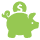

In [53]:
soup=BeautifulSoup(page.content)
soup

In [54]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $590,000          Condo For Sale',
 '         $599,000          Condo For Sale',
 '         $659,000          Condo For Sale',
 '         $669,000          Condo For Sale',
 '         $740,000          Condo For Sale',
 '         $795,000          Condo For Sale',
 '         $959,000          Condo For Sale',
 '         $1,385,000          Condo For Sale',
 '         $1,570,000          Condo For Sale',
 '         $1,795,000          Condo For Sale',
 '         $1,849,000          Condo For Sale',
 '         $299,950          Condo For Sale',
 '         $370,000          Condo For Sale',
 '         $439,000          Condo For Sale',
 '         $475,000          Condo For Sale',
 '         $475,000          Condo For Sale',
 '         $485,000          Condo For Sale',
 '         $499,900          Condo For Sale',
 '         $524,999          Condo For Sale',
 '         $525,000          Condo For Sale',
 '         $525,000          Condo For Sale',
 '         $534,900       

In [55]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             Randi Feilich - Beverly and Company, Inc. - 24-401303           ',
 '             Emilee Jones - The Bienstock Group - 24-387971           ',
 '             Angelo Fierro - Compass - 24-401792           ',
 '             Payman Shilian - Compass - 24-388959           ',
 '             Debra Moore Langaigne - KW Advisors - 24-400703           ',
 '             Steven Medina - Hilton & Hyland - 24-402025           ',
 '             David Gaeta - Nourmand & Associates-BW - 24-400661           ',
 '             Brett Miller - Nourmand & Associates-BW - 24-401415           ',
 '             Litta Lee - Coldwell Banker Realty - 24-401519           ',
 '             Holly Edwards - Douglas Elliman - 24-401161           ',
 '             Gary Limjap - Coldwell Banker Realty - 24-400409           ',
 '             Belinda Hernandez - T.N.G. Real Estate Consultants - PW24111899           ',
 '             Sean Curts - Pinnacle Estate Properties, Inc. - 224002264           ',
 '   

In [56]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         2 Bd | 1 Bath | 869 Sqft       ',
 '                  Listing Courtesy of:                             Randi Feilich - Beverly and Company, Inc. - 24-401303           ',
 '         2 Bd | 2 Bath | 904 Sqft       ',
 '                  Listing Courtesy of:                             Emilee Jones - The Bienstock Group - 24-387971           ',
 '         1 Bd | 1 Bath | 800 Sqft       ',
 '                  Listing Courtesy of:                             Angelo Fierro - Compass - 24-401792           ',
 '         2 Bd | 2 Bath | 829 Sqft       ',
 '                  Listing Courtesy of:                             Payman Shilian - Compass - 24-388959           ',
 '         2 Bd | 2 Bath | 1,110 Sqft       ',
 '                  Listing Courtesy of:                             Debra Moore Langaigne - KW Advisors - 24-400703           ',
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath | 1,120 Sqft       ',
 '                  Listing Courtesy of:                           

In [57]:
import re
property_info =   ['         1 Bd | 1 Bath | 679 Sqft       ',
 '                  Listing Courtesy of:                             Belinda Hernandez - T.N.G. Real Estate Consultants - PW24111899           ',
 '         2 Bd | 1 Bath | 826 Sqft       ',
 '                  Listing Courtesy of:                             Sean Curts - Pinnacle Estate Properties, Inc. - 224002264           ',
 '         1 Bd | 1 Bath | 610 Sqft       ',
 '                  Listing Courtesy of:                             Marsha Snyder - Keller Williams Realty World Class - SR24071111           ',
 '         4 Bd | 3 Bath | 1,830 Sqft       ',
 '                  Listing Courtesy of:                             Rhett Richar Winchell - Kennedy Wilson Real Estate Sales & Marke - 24-401061           ',
 '         1 Bd | 1 Bath | 711 Sqft       ',
 '                  Listing Courtesy of:                             Sean Rodriguez - RE/MAX Estate Properties - PV24116294           ',
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath | 905 Sqft       ',
 '                  Listing Courtesy of:                             Marly Tempel - Rodeo Realty - SR24115451           ',
 '         2 Bd | 2 Bath | 770 Sqft       ',
 '                  Listing Courtesy of:                             Michelle Crochet - Keller Williams Realty World Media Center - BB24114743           ',
 '         2 Bd | 1 Bath | 1,000 Sqft       ',
 '                  Listing Courtesy of:                             Cynthia A Sparagna - Realty ONE Group Summit - V1-23825           ',
 '         2 Bd | 2 Bath | 1,297 Sqft       ',
 '                  Listing Courtesy of:                             NICHOLAS ABBADESSA - RE/MAX MASTERS REALTY - CV24116164           ',
 '         3 Bd | 2 Bath | 1,080 Sqft       ',
 '                  Listing Courtesy of:                             Cade Cashman - Equity Union - SR24116845           ',
 '         2 Bd | 2 Bath | 815 Sqft       ',
 '                  Listing Courtesy of:                             Michelle Crochet - Keller Williams Realty World Media Center - BB24114275           ',
 '         2 Bd | 2 Bath | 920 Sqft       ',
 '                  Listing Courtesy of:                             Lior Bitan - Keller Williams Coastal Properties - SR24109647           ',
 '         1 Bd | 1 Bath | 673 Sqft       ',
 '                  Listing Courtesy of:                             M. Michele Martin - Rodeo Realty - 24-399911           ',
 '         1 Bd | 1 Bath | 860 Sqft       ',
 '                  Listing Courtesy of:                             Abraham Hernandez - Premier Real Estate Broker, Inc. - 24-392195           ',
 '         2 Bd | 2 Bath | 1,069 Sqft       ',
 '                  Listing Courtesy of:                             Brian Christie - RE/MAX ESTATE PROPERTIES - 24-399007           ',
 '         1 Bd | 1 Bath | 720 Sqft       ',
 '                  Listing Courtesy of:                             Howie Nicoll - Keller Williams Beverly Hills - 24-401857           ',
 ' Get Connected Today! ',
 '         1 Bd | 1 Bath | 593 Sqft       ',
 '                  Listing Courtesy of:                             Kellie Logsdon - Compass - 24-401099           ',
 '         3 Bd | 3 Bath | 1,260 Sqft       ',
 '                  Listing Courtesy of:                             Paul Sun - Pinnacle Real Estate Group - AR24116951           ',
 '         2 Bd | 3 Bath | 1,153 Sqft       ',
 '                  Listing Courtesy of:                             NINA HSU - COLDWELL BANKER GEORGE REALTY - WS24116745           ',
 '         3 Bd | 3 Bath | 1,386 Sqft       ',
 '                  Listing Courtesy of:                             LAN XIAO - RE/MAX ELITE REALTY - WS24111571           ',
 '         3 Bd | 3 Bath | 1,382 Sqft       ',
 '                  Listing Courtesy of:                             XUEMEI SUN - Pinnacle Real Estate Group - WS24115768           ',
 '         1 Bd | 1 Bath | 806 Sqft       ',
 '                  Listing Courtesy of:                             Gaye Kruger - Nourmand & Associates-BW - 24-385189           ']

pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})

for item in bed_bath_sqft:
    print(item)

{'Bed': '1', 'Bath': '1', 'Sqft': '679'}
{'Bed': '2', 'Bath': '1', 'Sqft': '826'}
{'Bed': '1', 'Bath': '1', 'Sqft': '610'}
{'Bed': '4', 'Bath': '3', 'Sqft': '1830'}
{'Bed': '1', 'Bath': '1', 'Sqft': '711'}
{'Bed': '2', 'Bath': '2', 'Sqft': '905'}
{'Bed': '2', 'Bath': '2', 'Sqft': '770'}
{'Bed': '2', 'Bath': '1', 'Sqft': '1000'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1297'}
{'Bed': '3', 'Bath': '2', 'Sqft': '1080'}
{'Bed': '2', 'Bath': '2', 'Sqft': '815'}
{'Bed': '2', 'Bath': '2', 'Sqft': '920'}
{'Bed': '1', 'Bath': '1', 'Sqft': '673'}
{'Bed': '1', 'Bath': '1', 'Sqft': '860'}
{'Bed': '2', 'Bath': '2', 'Sqft': '1069'}
{'Bed': '1', 'Bath': '1', 'Sqft': '720'}
{'Bed': '1', 'Bath': '1', 'Sqft': '593'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1260'}
{'Bed': '2', 'Bath': '3', 'Sqft': '1153'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1386'}
{'Bed': '3', 'Bath': '3', 'Sqft': '1382'}
{'Bed': '1', 'Bath': '1', 'Sqft': '806'}


In [58]:
beds = []
baths = []
sqfts = []

for item in bed_bath_sqft:
    beds.append(item['Bed'])
    baths.append(item['Bath'])
    sqfts.append(item['Sqft'])
    
print("Beds:", beds)
print("Baths:", baths)
print("Sqfts:", sqfts)

Beds: ['1', '2', '1', '4', '1', '2', '2', '2', '2', '3', '2', '2', '1', '1', '2', '1', '1', '3', '2', '3', '3', '1']
Baths: ['1', '1', '1', '3', '1', '2', '2', '1', '2', '2', '2', '2', '1', '1', '2', '1', '1', '3', '3', '3', '3', '1']
Sqfts: ['679', '826', '610', '1830', '711', '905', '770', '1000', '1297', '1080', '815', '920', '673', '860', '1069', '720', '593', '1260', '1153', '1386', '1382', '806']


In [59]:
min_length = min(len(address), len(price), len(beds), len(baths), len(sqfts))

address = address[:min_length]
price = price[:min_length]
beds = beds[:min_length]
baths = baths[:min_length]
sqfts = sqfts[:min_length]

print("Length of address:", len(address))
print("Length of price:", len(price))
print("Length of beds:", len(beds))
print("Length of baths:", len(baths))
print("Length of sqfts:", len(sqfts))

Length of address: 22
Length of price: 22
Length of beds: 22
Length of baths: 22
Length of sqfts: 22


In [60]:
df=pd.DataFrame({'Price':price,'Address':address,'Beds':beds,'Baths':baths,'Sqfts':sqfts})
df

,Price,Address,Beds,Baths,Sqfts
0,"$590,000 Condo For Sale",Randi Feilich - Beverly and Compa...,1,1,679
1,"$599,000 Condo For Sale",Emilee Jones - The Bienstock Grou...,2,1,826
2,"$659,000 Condo For Sale",Angelo Fierro - Compass - 24-4017...,1,1,610
3,"$669,000 Condo For Sale",Payman Shilian - Compass - 24-388...,4,3,1830
4,"$740,000 Condo For Sale",Debra Moore Langaigne - KW Adviso...,1,1,711
5,"$795,000 Condo For Sale",Steven Medina - Hilton & Hyland -...,2,2,905
6,"$959,000 Condo For Sale",David Gaeta - Nourmand & Associat...,2,2,770
7,"$1,385,000 Condo For Sale",Brett Miller - Nourmand & Associa...,2,1,1000
8,"$1,570,000 Condo For Sale",Litta Lee - Coldwell Banker Realt...,2,2,1297
9,"$1,795,000 Condo For Sale",Holly Edwards - Douglas Elliman -...,3,2,1080


In [61]:
df.to_csv('california_condos.csv', index=False)

In [62]:
page=requests.get('https://homefinder.com/homes-for-sale/NJ/Cape-May?propertyTypes=SFH')

b'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <title>Cape May, NJ Homes For Sale &amp; Real Estate | MLS Listings in Cape May, NJ</title><meta data-n-head="ssr" data-hid="format-detection" name="format-detection" content="telephone=no"><meta data-n-head="ssr" data-hid="charset" charset="utf-8"><meta data-n-head="ssr" data-hid="viewport" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" data-hid="mobile-web-app-capable" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title" content="HomeFinder"><meta data-n-head="ssr" data-hid="theme-color" name="theme-color" content="#f48024"><meta data-n-head="ssr" data-hid="og:type" name="og:type" property="og:type" content="website"><meta data-n-head="ssr" data-hid="og:site_name" name="og:site_name" property="og:site_name" content="HomeFinder"><meta data
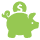

In [64]:
page.content

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Cape May, NJ Homes For Sale &amp; Real Estate | MLS Listings in Cape May, NJ</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:site_name"/><meta conte
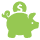

In [65]:
soup=BeautifulSoup(page.content)
soup

In [66]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $3,200,000          House For Sale',
 '         $1,199,000          House For Sale',
 '         $1,199,000          House For Sale',
 '         $689,900          House For Sale',
 '         $2,195,000          House For Sale',
 '         $795,000          House For Sale',
 '         $695,000          House For Sale',
 '         $3,890,000          House For Sale',
 '         $925,000          House For Sale',
 '         $2,299,999          House For Sale',
 '         $2,499,900          House For Sale',
 '         $2,999,999          House For Sale',
 '         $2,299,999          House For Sale',
 '         $4,995,000          House For Sale',
 '         $4,995,000          House For Sale',
 '         $3,150,000          House For Sale',
 '         $4,950,000          House For Sale',
 '         $4,950,000          House For Sale',
 '         $2,195,000          House For Sale',
 '         $2,195,000          House For Sale',
 '         $1,425,000          House For Sale',


In [84]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241655           ',
 '             Rebecca Chamberlain,SFR,SRES - LONG & FOSTER REAL ESTATE, INC cm - 241490           ',
 '             Rebecca S Chamberlain - Cape May - 241490           ',
 '             Gail Wilsey-Morrison - Cape May - NJCM2003406           ',
 "             Christina P. Clemans, ABR, CRS, GRI - Tim Kerr Sotheby's International Realty - 241102           ",
 '             Gail Wilsey-Morrison - Cape May - NJCM2003388           ',
 '             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241054           ',
 '             Colleen White - DESATNICK REAL ESTATE, LLC - 584108           ',
 '             MaryAnn Donahue - deSatnick Real Estate LLC - Cape May - 241034           ',
 "             Michelle L Roberts - O'Donnell - Cape May - 240992           ",
 '             Carole Pantalone - HOFFMAN AGENCY - 241040           ',
 '             James Zeitler - JERSEY CAPE REALTY - 241018     

In [85]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         6 Bd | 6 Bath | 3,114 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241655           ',
 '         5 Bd | 4 Bath | 2,422 Sqft       ',
 '                  Listing Courtesy of:                             Rebecca Chamberlain,SFR,SRES - LONG & FOSTER REAL ESTATE, INC cm - 241490           ',
 '         5 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             Rebecca S Chamberlain - Cape May - 241490           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - NJCM2003406           ',
 '         6 Bd | 3 Bath | 3,426 Sqft       ',
 "                  Listing Courtesy of:                             Christina P. Clemans, ABR, CRS, GRI - Tim Kerr Sotheby's International Realty - 241102           ",
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath       ',
 '       

In [72]:
import re
listings =
['         6 Bd | 6 Bath | 3,114 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241655           ',
 '         5 Bd | 4 Bath | 2,422 Sqft       ',
 '                  Listing Courtesy of:                             Rebecca Chamberlain,SFR,SRES - LONG & FOSTER REAL ESTATE, INC cm - 241490           ',
 '         5 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             Rebecca S Chamberlain - Cape May - 241490           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - NJCM2003406           ',
 '         6 Bd | 3 Bath | 3,426 Sqft       ',
 "                  Listing Courtesy of:                             Christina P. Clemans, ABR, CRS, GRI - Tim Kerr Sotheby's International Realty - 241102           ",
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - NJCM2003388           ',
 '         3 Bd | 2 Bath | 1,722 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241054           ',
 '         4 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             Colleen White - DESATNICK REAL ESTATE, LLC - 584108           ',
 '         3 Bd | 2 Bath | 1,482 Sqft       ',
 '                  Listing Courtesy of:                             MaryAnn Donahue - deSatnick Real Estate LLC - Cape May - 241034           ',
 '         8 Bd | 3 Bath       ',
 "                  Listing Courtesy of:                             Michelle L Roberts - O'Donnell - Cape May - 240992           ",
 '         5 Bd | 3 Bath       ',
 '                  Listing Courtesy of:                             Carole Pantalone - HOFFMAN AGENCY - 241040           ',
 '         5 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             James Zeitler - JERSEY CAPE REALTY - 241018           ',
 '         8 Bd | 3 Bath | 3,783 Sqft       ',
 "                  Listing Courtesy of:                             Michelle Roberts-O'Donnell - LONG & FOSTER REAL ESTATE, INC cm - 240992           ",
 '         8 Bd | 9 Bath | 4,293 Sqft       ',
 '                  Listing Courtesy of:                             RYAN MANNEY - Compass New Jersey, LLC - Moorestown - NJCM2003336           ',
 '         8 Bd | 9 Bath       ',
 '                  Listing Courtesy of:                             Henry Lanzalotti - JERSEY CAPE REALTY - 240887           ',
 '         6 Bd | 5 Bath | 4,771 Sqft       ',
 '                  Listing Courtesy of:                             SHARON PALMISCIANO - BALSLEY/LOSCO - 569106           ',
 ' Get Connected Today! ',
 '         13 Bd | 11 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - 232455           ',
 '         13 Bd | 11 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - NJCM2002552           ',
 '         5 Bd | 5 Bath | 3,000 Sqft       ',
 '                  Listing Courtesy of:                             Michael C. Powers - KELLER WILLIAMS REALTY JERSEY SHORE  - AV - 240151           ',
 '         5 Bd | 5 Bath | 3,000 Sqft       ',
 '                  Listing Courtesy of:                             Michael C. Powers - KELLER WILLIAMS REALTY JERSEY SHORE  - AV - 240150           ',
 '         5 Bd | 3 Bath       ',
 '                  Listing Courtesy of:                             James Zeitler - JERSEY CAPE REALTY - 240147           ',
 '         3 Bd | 2 Bath | 1,648 Sqft       ',
 '                  Listing Courtesy of:                             Theresa L. Senico, ABR,GRI,SRES - deSatnick Real Estate LLC - Lower Township - 240094           ']

bedrooms = []
bathrooms = []
sqft = []

bed_regex = r'(\d+)\s*Bd'
bath_regex = r'(\d+)\s*Bath'
sqft_regex = r'(\d+,*\d*)\s*Sqft'

for listing in listings:
   
    match_bed = re.search(bed_regex, listing)
    if match_bed:
        bedrooms.append(int(match_bed.group(1)))
    else:
        continue
    match_bath = re.search(bath_regex, listing)
    if match_bath:
        bathrooms.append(int(match_bath.group(1)))
    else:
        continue
    match_sqft = re.search(sqft_regex, listing)
    if match_sqft:
        sqft.append(int(match_sqft.group(1).replace(',', '')))
    else:
        continue
print("Bedrooms:", bedrooms)
print("Bathrooms:", bathrooms)
print("Square Footage:", sqft)

Bedrooms: [6, 5, 5, 3, 6, 2, 3, 4, 3, 8, 5, 5, 8, 8, 8, 6, 13, 13, 5, 5, 5, 3]
Bathrooms: [6, 4, 4, 2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 9, 9, 5, 11, 11, 5, 5, 3, 2]
Square Footage: [3114, 2422, 3426, 1722, 1482, 3783, 4293, 4771, 3000, 3000, 1648]


In [89]:
page=requests.get('https://homefinder.com/homes-for-sale/NJ/Cape-May?propertyTypes=CONDOUNIT')

b'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <title>Cape May, NJ Homes For Sale &amp; Real Estate | MLS Listings in Cape May, NJ</title><meta data-n-head="ssr" data-hid="format-detection" name="format-detection" content="telephone=no"><meta data-n-head="ssr" data-hid="charset" charset="utf-8"><meta data-n-head="ssr" data-hid="viewport" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" data-hid="mobile-web-app-capable" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title" content="HomeFinder"><meta data-n-head="ssr" data-hid="theme-color" name="theme-color" content="#f48024"><meta data-n-head="ssr" data-hid="og:type" name="og:type" property="og:type" content="website"><meta data-n-head="ssr" data-hid="og:site_name" name="og:site_name" property="og:site_name" content="HomeFinder"><meta data
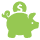

In [91]:
page.content

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<title>Cape May, NJ Homes For Sale &amp; Real Estate | MLS Listings in Cape May, NJ</title><meta content="telephone=no" data-hid="format-detection" data-n-head="ssr" name="format-detection"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="HomeFinder" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="#f48024" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="website" data-hid="og:type" data-n-head="ssr" name="og:type" property="og:type"/><meta content="HomeFinder" data-hid="og:site_name" data-n-head="ssr" name="og:site_name" property="og:site_name"/><meta conte
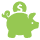

In [92]:
soup=BeautifulSoup(page.content)
soup

In [93]:
price= []

for i in soup.find_all('div', class_="h4 text-primary mb-0"):
     price.append(i.text.replace('\n',' '))

price

['         $995,000          Condo For Sale',
 '         $1,195,000          Condo For Sale',
 '         $2,350,000          Condo For Sale',
 '         $1,250,000          Condo For Sale',
 '         $525,000          Condo For Sale',
 '         $1,100,000          Condo For Sale',
 '         $1,150,000          Condo For Sale',
 '         $689,900          House For Sale',
 '         $689,900          House For Sale',
 '         $719,900          House For Sale',
 '         $1,499,900          House For Sale',
 '         $899,900          House For Sale',
 '         $3,890,000          House For Sale',
 '         $3,890,000          House For Sale',
 '         $1,384,000          House For Sale',
 '         $695,000          House For Sale',
 '         $899,900          House For Sale',
 '         $925,000          House For Sale',
 '         $1,425,000          House For Sale',
 '         $1,590,000          House For Sale',
 '         $869,900          House For Sale',
 '         $

In [94]:
address= []

for i in soup.find_all('span', class_="cobrand-attribution-line1 mt-1"):
     address.append(i.text.replace('\n',' '))

address

['             Heijung Park-Colameco - JERSEY CAPE REALTY - 241336           ',
 '             Heijung Park-Colameco - JERSEY CAPE REALTY - 241337           ',
 '             Tania Schade - SERHANT PENNSYLVANIA LLC - NJCM2003434           ',
 '             Alexis "Lexi" Hudson - deSatnick Real Estate LLC - Cape May - 241120           ',
 '             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241051           ',
 '             Ronnie Glomb - YOUR TOWN REALTY - 240904           ',
 '             Jason Drissel - Keller Williams Real Estate - Blue Bell - 582773           ',
 '             Gail Wilsey-Morrison - Cape May - 241122           ',
 '             Gail Wilsey-Morrison - Cape May - NJCM2003406           ',
 '             Theresa L. Senico, ABR,GRI,SRES - deSatnick Real Estate LLC - Lower Township - 241543           ',
 '             Ryan Griffin - deSatnick Real Estate LLC - Cape May - 241127           ',
 '             Micah Yerk - deSatnick Real Estate LLC - Lower T

In [97]:
all= []

for i in soup.find_all('div', class_="text-muted"):
     all.append(i.text.replace('\n',' '))

all

['         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Heijung Park-Colameco - JERSEY CAPE REALTY - 241336           ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Heijung Park-Colameco - JERSEY CAPE REALTY - 241337           ',
 '         4 Bd | 5 Bath | 2,622 Sqft       ',
 '                  Listing Courtesy of:                             Tania Schade - SERHANT PENNSYLVANIA LLC - NJCM2003434           ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Alexis "Lexi" Hudson - deSatnick Real Estate LLC - Cape May - 241120           ',
 '         1 Bd | 1 Bath | 624 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241051           ',
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:      

In [98]:
import re
listings = ['         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Heijung Park-Colameco - JERSEY CAPE REALTY - 241336           ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Heijung Park-Colameco - JERSEY CAPE REALTY - 241337           ',
 '         4 Bd | 5 Bath | 2,622 Sqft       ',
 '                  Listing Courtesy of:                             Tania Schade - SERHANT PENNSYLVANIA LLC - NJCM2003434           ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Alexis "Lexi" Hudson - deSatnick Real Estate LLC - Cape May - 241120           ',
 '         1 Bd | 1 Bath | 624 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241051           ',
 ' Get Connected Today! ',
 '         2 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Ronnie Glomb - YOUR TOWN REALTY - 240904           ',
 '         3 Bd | 2 Bath | 1,785 Sqft       ',
 '                  Listing Courtesy of:                             Jason Drissel - Keller Williams Real Estate - Blue Bell - 582773           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - 241122           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Gail Wilsey-Morrison - Cape May - NJCM2003406           ',
 '         4 Bd | 2 Bath | 1,629 Sqft       ',
 '                  Listing Courtesy of:                             Theresa L. Senico, ABR,GRI,SRES - deSatnick Real Estate LLC - Lower Township - 241543           ',
 '         4 Bd | 4 Bath | 2,023 Sqft       ',
 '                  Listing Courtesy of:                             Ryan Griffin - deSatnick Real Estate LLC - Cape May - 241127           ',
 '         3 Bd | 3 Bath | 2,324 Sqft       ',
 '                  Listing Courtesy of:                             Micah Yerk - deSatnick Real Estate LLC - Lower Township - 241369           ',
 '         4 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             Colleen White - DESATNICK REAL ESTATE, LLC - 584108           ',
 '         4 Bd | 4 Bath       ',
 '                  Listing Courtesy of:                             Colleen White - deSatnick Real Estate LLC - Cape May - 233173           ',
 '         3 Bd | 2 Bath       ',
 '                  Listing Courtesy of:                             Todd H. DeSatnick - deSatnick Real Estate LLC - Cape May - 240143           ',
 '         3 Bd | 2 Bath | 1,722 Sqft       ',
 '                  Listing Courtesy of:                             Maureen Harris, CRS, GRI - CENTURY 21 GILMARTIN & CO - 241054           ',
 ' Get Connected Today! ',
 '         2 Bd | 1 Bath       ',
 '                  Listing Courtesy of:                             Brian Giancola - RE/MAX SURFSIDE - 240902           ',
 '         3 Bd | 2 Bath | 1,482 Sqft       ',
 '                  Listing Courtesy of:                             MaryAnn Donahue - deSatnick Real Estate LLC - Cape May - 241034           ',
 '         5 Bd | 3 Bath       ',
 '                  Listing Courtesy of:                             James Zeitler - JERSEY CAPE REALTY - 240147           ',
 '         4 Bd | 3 Bath | 2,566 Sqft       ',
 '                  Listing Courtesy of:                             Charity R Clark, ABR, GRI - CAPE RESORTS REALTY - 241244           ',
 '         5 Bd | 5 Bath       ',
 '                  Listing Courtesy of:                             Lisa Maurer - CENTURY 21 ALLIANCE  - NCM - 240170           ',
 '         6 Bd | 3 Bath | 3,426 Sqft       ',
 "                  Listing Courtesy of:                             Christina P. Clemans, ABR, CRS, GRI - Tim Kerr Sotheby's International Realty - 241102           "]
pattern = r'(\d+)\s+Bd\s+\|\s+(\d+)\s+Bath\s+\|\s+([\d,]+)\s+Sqft'

bed_bath_sqft = []
for info in property_info:
    match = re.search(pattern, info)
    if match:
        bed, bath, sqft = match.groups()
        bed_bath_sqft.append({'Bed': bed.strip(), 'Bath': bath.strip(), 'Sqft': sqft.replace(',', '').strip()})

for item in bed_bath_sqft:
    print(item)



TypeError: 'tuple' object is not callable